Import Relevent Libraries

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

Read in the csv file

In [2]:
cookies_cats = pd.read_csv("C:/Users/kike_/Downloads/cookie_cats.csv")
print(cookies_cats.head())

   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


Check for Duplicates, Blank Rows and NA

In [3]:
cookies_cats.duplicated().value_counts(dropna=True)

False    90189
dtype: int64

In [4]:
cookies_cats.groupby(by="version").count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Check Outliers

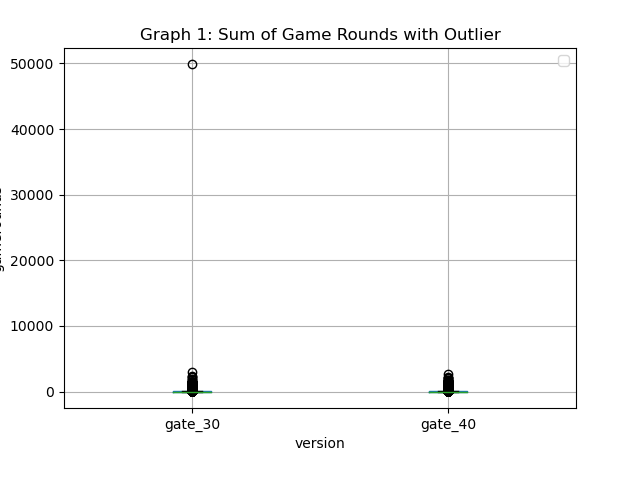

In [5]:
cookies_cats.boxplot(column=['sum_gamerounds'], by = 'version')
plt.title('Graph 1: Sum of Game Rounds with Outlier')
plt.suptitle('')
plt.xlabel('version')
plt.ylabel('gamerounds')
plt.legend('')
plt.show()


Identify the highest sum_gamrounds

In [6]:
cookies_cats.sum_gamerounds.max() 

49854

Remove outliers, visualise new data without outliers

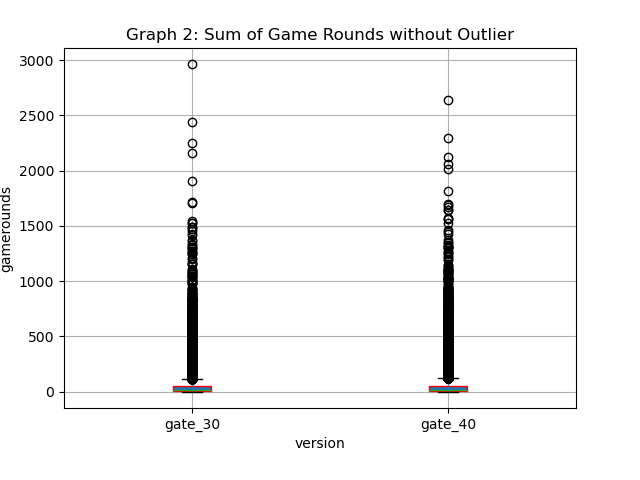

In [7]:
cookies_cats01 = cookies_cats.drop(cookies_cats['sum_gamerounds'].idxmax()) #remove max value

cookies_cats01.boxplot(column=['sum_gamerounds'], by = 'version', patch_artist=True, boxprops = dict(color= 'red')) #show new boxplot
plt.title('Graph 2: Sum of Game Rounds without Outlier')
plt.suptitle('')
plt.xlabel('version')
plt.ylabel('gamerounds')
plt.show()

Calculate summary statistics and standard deviation after removing the outliers

In [8]:
cookies_cats01.groupby(['version']).sum_gamerounds.describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
gate_30,44699.0,51.342111,102.057598,0.0,5.0,17.0,50.0,2961.0
gate_40,45489.0,51.298776,103.294416,0.0,5.0,16.0,52.0,2640.0


In [9]:
cookies_cats01.groupby(['version']).sum_gamerounds.median()

version
gate_30    17.0
gate_40    16.0
Name: sum_gamerounds, dtype: float64

Split and define A/B groups


In [10]:
group_30 = cookies_cats01.query("version=='gate_30'").drop("version", axis = 1)
group_40 = cookies_cats01.query("version=='gate_40'").drop("version", axis = 1)
print("Gate 30 = A Group")
print(f"{group_30.head()} \n ")

print("Gate 40 = B Group")
print(group_40.head())

Gate 30 = A Group
    userid  sum_gamerounds  retention_1  retention_7
0      116               3        False        False
1      337              38         True        False
6     1066               0        False        False
11    2101               0        False        False
13    2179              39         True        False 
 
Gate 40 = B Group
   userid  sum_gamerounds  retention_1  retention_7
2     377             165         True        False
3     483               1        False        False
4     488             179         True         True
5     540             187         True         True
7    1444               2        False        False


Check if both groups have normal distribution using histogram

According to the histogram, the graphical representation using the histograms below, A and B groups are not normal distribution. They are both right tailed. 


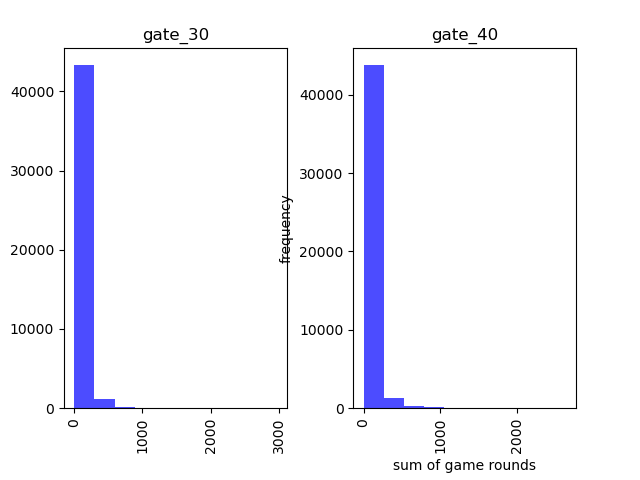

In [11]:

print(f"According to the histogram, the graphical representation using the histograms below, A and B groups are not normal distribution. They are both right tailed. ")

cookies_cats01.hist(column=['sum_gamerounds'], by = 'version', facecolor = 'b', alpha = 0.7)
plt.xlabel('sum of game rounds') 
plt.ylabel('frequency')
plt.show()

Selecting the sum_gamerounds, coverting to numpy and flattening it to reshape from a two-dimensional to a one-dimensional

In [12]:

levene_test = stats.levene(group_30[['sum_gamerounds']].to_numpy().flatten(), group_40[['sum_gamerounds']].to_numpy().flatten()) 
print(levene_test)

LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)


Applying Hypothesis Testing

In [13]:
print(f"H0: there is no difference between the two groups, H1: there is difference between the two groups\n")

hypothesis_testing = stats.mannwhitneyu(x = group_30['sum_gamerounds'], y = group_40['sum_gamerounds']) 

print(hypothesis_testing)

H0: there is no difference between the two groups, H1: there is difference between the two groups

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.05089155279145376)


Percentage of users that played after they played the game after installing the game on day 1 and day 7

In [41]:
pd.DataFrame(
    {'retention_1': cookies_cats01['retention_1'].value_counts('True') * 100,
    'retention_7': cookies_cats01['retention_7'].value_counts('True') * 100}

)


,retention_1,retention_7
False,55.478556,81.394421
True,44.521444,18.605579


In [43]:
pd.DataFrame({
    'retention_1': cookies_cats01.groupby(['version'])['retention_1'].value_counts('True') * 100,
    'retention_7': cookies_cats01.groupby(['version'])['retention_7'].value_counts('True') * 100
        })

retention_1  retention_7
version                                
gate_30 False    55.180205    80.981677
        True     44.819795    19.018323
gate_40 False    55.771725    81.799996
        True     44.228275    18.200004

In [55]:
#cookies_cats01.drop(columns = 'retention', axis = 1)
cookies_cats01["retention"]  = str(cookies_cats01['retention_1']) + str(cookies_cats01['retention_7'])
print(cookies_cats01["retention"] )

0        0        False\n1         True\n2         True...
1        0        False\n1         True\n2         True...
2        0        False\n1         True\n2         True...
3        0        False\n1         True\n2         True...
4        0        False\n1         True\n2         True...
                               ...                        
90184    0        False\n1         True\n2         True...
90185    0        False\n1         True\n2         True...
90186    0        False\n1         True\n2         True...
90187    0        False\n1         True\n2         True...
90188    0        False\n1         True\n2         True...
Name: retention, Length: 90188, dtype: object
